In [1]:
import os
import pandas as pd

def visulize_result_with_condition(condition, matrixes):
    print(f"experiment: {condition}")
    for matrix in matrixes:
        for filename in os.listdir(os.path.abspath('.')):
            if condition in filename and matrix in filename:
                result = pd.read_csv(filename)
                mean_value = round(result[matrix].mean(), 5)
                mean_value *= 100
                print(f'{matrix}: {mean_value:.5}')

In [2]:
matrixes = [
    'faithfulness',
    'answer_relevancy',
    'answer_similarity',
    'answer_correctness',
    'context_precision',
    'context_utilization',
    'context_recall',
    'context_entity_recall'
]

condition = "condition_1"

visulize_result_with_condition(condition, matrixes)

experiment: condition_1
faithfulness: 86.317
answer_relevancy: 90.15
answer_similarity: 95.21
answer_correctness: 82.04
context_precision: 94.978
context_utilization: 95.426
context_recall: 92.481
context_entity_recall: 68.379


In [3]:
condition = 'condition_2'
visulize_result_with_condition(condition, matrixes)

experiment: condition_2


In [5]:
import pandas as pd
recall = pd.read_csv('dataset_condition_1_context_recall_2024-10-13-12-40-25.csv')
recall['context_recall']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1110    1.0
1111    1.0
1112    1.0
1113    1.0
1114    1.0
Name: context_recall, Length: 1115, dtype: float64

In [15]:
# Assuming entity_recall is a pandas DataFrame
filtered_recall = recall[recall['context_recall'] < 0.5]

save_name = 'filtered_recall.txt'
# Open a text file to write the output
with open(save_name, 'w') as f:
    # Iterate over the filtered DataFrame and write each element to the file
    for index, row in filtered_recall.iterrows():
        f.write(f"Row {index}:\n")
        f.write(f"Question: {row['question']}\n")
        f.write(f"Ground Truth: {row['ground_truth']}\n")
        f.write(f"Answer: {row['answer']}\n")
        f.write(f"Contexts: {row['contexts']}\n")
        f.write(f"Context Entity Recall: {row['context_recall']}\n")
        f.write("\n")  # Adding a blank line for better readability

print(f"Filtered entity recall has been written to '{save_name}'")


Filtered entity recall has been written to 'filtered_recall.txt'


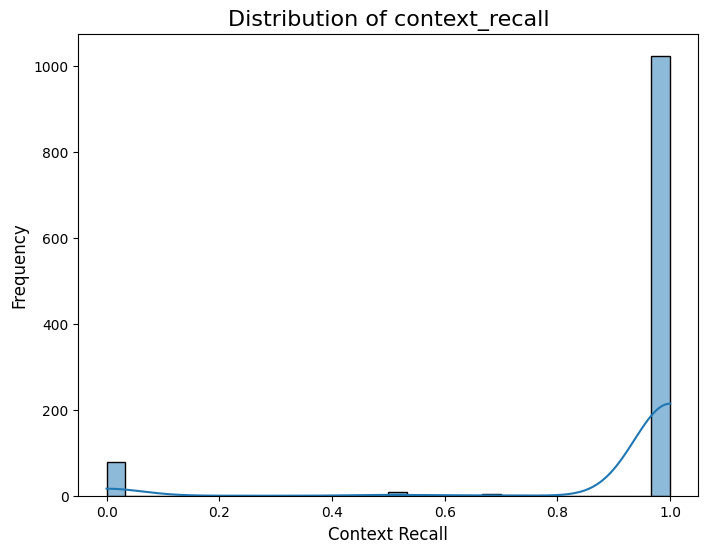

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(recall['context_recall'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of context_recall', fontsize=16)
plt.xlabel('Context Recall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()

In [23]:
from datasets import Dataset
from ragas import evaluate

from ragas.metrics import (
    faithfulness,
    answer_relevancy,
    answer_similarity,
    answer_correctness,
    context_precision,
    context_utilization,
    context_recall,
    context_entity_recall,
    noise_sensitivity_relevant,
    noise_sensitivity_irrelevant
)
import os
import sys
sys.path.insert(0, os.path.abspath('../../..'))
from configs.load_config import load_configs
load_configs()

dataset = Dataset.from_dict(
    {
        'question': ['What are the recent advancements in isolating new microorganisms that produce cellulase enzymes for bioethanol production?'],
        'ground_truth': ['Recent advancements in isolating new microorganisms focus on discovering bacteria and fungi from extreme environments that exhibit higher stability and activity of cellulase enzymes. Techniques such as metagenomics and high-throughput screening have accelerated the identification of these microorganisms. Advances in genetic modification and synthetic biology have also enabled the engineering of microbial strains to enhance their cellulase production capabilities.'],
        'answer': ['The research article discusses recent advancements in isolating new microorganisms that produce cellulase enzymes, which are crucial for the efficient conversion of cellulose in lignocellulosic biomass to bioethanol. These advancements include the identification and characterization of novel microbial strains with enhanced cellulase production capabilities. The authors emphasize the significance of exploring diverse environments, such as extreme habitats or underexplored ecosystems, to discover microorganisms that can produce more effective cellulase cocktails. Additionally, advancements in molecular techniques and genomic analysis have facilitated the identification of specific genes responsible for cellulase production, allowing for targeted isolation and optimization of these microorganisms. Overall, the focus on isolating new cellulase-producing microorganisms is seen as a key growth area in the cellulase industry, with the potential to improve bioethanol production efficiency.'],
        'contexts': [['This research article explores recent developments in improving cellulase cocktail performance for efficient conversion of cellulose in lignocellulosic biomass to bioethanol. The authors discuss the importance of isolating new microorganisms that produce these enzymes and highlight potential growth areas in the cellulase industry.']]
    }
)

evaluate(
    dataset=dataset,
    metrics=[context_recall],
    raise_exceptions=True
)

Evaluating:   0%|          | 0/1 [00:00<?, ?it/s]

[ContextRecallClassificationAnswers(__root__=[ContextRecallClassificationAnswer(statement='Recent advancements in isolating new microorganisms focus on discovering bacteria and fungi from extreme environments that exhibit higher stability and activity of cellulase enzymes.', attributed=1, reason='The context mentions the importance of isolating new microorganisms that produce cellulase enzymes.'), ContextRecallClassificationAnswer(statement='Techniques such as metagenomics and high-throughput screening have accelerated the identification of these microorganisms.', attributed=0, reason='The context does not provide specific techniques used for identifying microorganisms.'), ContextRecallClassificationAnswer(statement='Advances in genetic modification and synthetic biology have also enabled the engineering of microbial strains to enhance their cellulase production capabilities.', attributed=0, reason='The context does not mention genetic modification or synthetic biology in relation to c

{'context_recall': 0.3333}

In [9]:
entity_recall = pd.read_csv('dataset_condition_1_context_entity_recall_2024-10-13-12-40-25.csv')
entity_recall

,question,ground_truth,answer,contexts,context_entity_recall
0,What structural factor allows for easy water a...,Cracked cuticles allow for easy water absorpti...,Cracked cuticles in soybean cultivars allow fo...,['This research investigates the differences i...,0.666667
1,Why do intact cuticles remain impermeable to w...,Intact cuticles remain impermeable due to the ...,Intact cuticles remain impermeable to water be...,['This research investigates the differences i...,0.500000
2,How can the permeability of intact cuticles be...,Heat and alkaline treatments can temporarily r...,The permeability of intact cuticles can be tem...,['This research investigates the differences i...,0.666667
3,Why has the production of healthy sweeteners l...,The production of healthy sweeteners like fruc...,The production of healthy sweeteners like fruc...,['The production of healthy sweeteners like fr...,1.000000
4,What are the methods mentioned for producing f...,Fructose can be made using either multi-enzyma...,Fructose can be produced using either multi-en...,['The production of healthy sweeteners like fr...,0.750000
...,...,...,...,...,...
1110,What are the primary lifestyle factors contrib...,Obesity is commonly caused by excessive food i...,The primary lifestyle factors contributing to ...,['Obesity is one of very first warning signs f...,0.333333
1111,How do sedentary lifestyles affect energy meta...,Sedentary lifestyles affect the homeostasis of...,Sedentary lifestyles negatively impact energy ...,"['In fact, it is usually the consequence of se...",0.666667
1112,What potential strategies are suggested by the...,The research suggests both indirect and direct...,The research suggests that there may be indire...,['Although the manufacturing of living A. muci...,1.000000
1113,How do mental and physical conditions impact t...,Mental and physical conditions of the host sev...,Mental and physical conditions significantly i...,['Gut microbiota symbiotically reside in human...,0.200000


In [18]:
# Assuming entity_recall is a pandas DataFrame
filtered_entity_recall = entity_recall[entity_recall['context_entity_recall'] < 0.5]

save_name = 'filtered_entity_recall.txt'
# Open a text file to write the output
with open(save_name, 'w') as f:
    # Iterate over the filtered DataFrame and write each element to the file
    for index, row in filtered_entity_recall.iterrows():
        f.write(f"Row {index}:\n")
        f.write(f"Question: {row['question']}\n")
        f.write(f"Ground Truth: {row['ground_truth']}\n")
        f.write(f"Answer: {row['answer']}\n")
        f.write(f"Contexts: {row['contexts']}\n")
        f.write(f"Context Entity Recall: {row['context_entity_recall']}\n")
        f.write("\n")  # Adding a blank line for better readability

print(f"Filtered entity recall has been written to '{save_name}'")

Filtered entity recall has been written to 'filtered_entity_recall.txt'


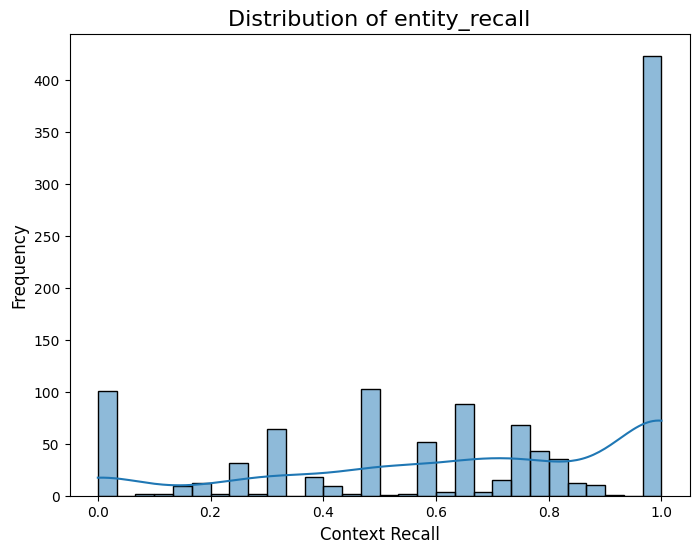

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution using seaborn
plt.figure(figsize=(8, 6))
sns.histplot(entity_recall['context_entity_recall'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of entity_recall', fontsize=16)
plt.xlabel('Context Recall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.show()